In [8]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(60000,)

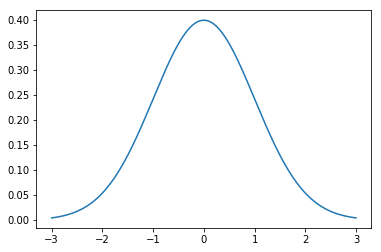

In [144]:
def f(x):
    return np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi)
    #return x**2
    
x_diff = 0.0001
x_min = -3
x_max = 3
x_grid = np.arange(x_min, x_max, x_diff)
plt.plot(x_grid, f(x_grid))

f_fft = fft(f_grid)
f_fft.shape

In [145]:
def brute_force_fourier(f, x_grid, t):
    f_grid = f(x_grid)
    return np.sum(f_grid * np.exp(-2 * np.pi * 1j * x_grid * t) * x_diff)

In [146]:
def f_fourier(t):
    x_range = x_max - x_min
    t_ind = int(np.round(x_range * t))
    return x_range * np.exp(-2 * np.pi * 1j * x_min * t) * f_fft[t_ind]

def f_fourier_brute(t):
    return brute_force_fourier(f, x_grid, t)
    
# These should match if I have understood the fft discretization (which I have not)
print('FFT: ', f_fourier(0.))
print('Brute force: ', f_fourier_brute(0.))


FFT:  (149991.65336534492+0j)
Brute force:  (0.9973002039125322+0j)


In [147]:
# Fourier transform of the standard Gaussian distribution
def phi(x, mu=0, sigma=1):
    return np.exp(-(0.5 / (sigma ** 2)) * ((x - mu) ** 2) - 0.5 * np.log(2 * np.pi * (sigma ** 2)))
    
def phi_fourier(t):
    return np.exp(-0.5 * (2 * np.pi * t) ** 2)

t = 0.0
print(phi_fourier(t))
print(brute_force_fourier(phi, x_grid, t))

1.0
(0.9973002039125322+0j)


In [148]:
def get_fourier_expectation(mu, sigma, brute=False):
    phi_fourier_vals = phi_fourier(mu / sigma) / sigma
    if brute:
        return f_fourier_brute(mu / (sigma ** 2)) * phi_fourier_vals
    else:
        return f_fourier(mu / (sigma ** 2)) * phi_fourier_vals

def get_expectation_brute(mu, sigma):
    f_grid = f(x_grid)
    phi_grid = phi(x_grid, mu, sigma)
    return np.sum(f_grid * phi_grid) * x_diff

def get_expectation_monte_carlo(mu, sigma, num_draws=10000):
    draws = np.random.normal(loc=mu, scale=sigma, size=num_draws)
    return np.mean(f(draws))

mu = 0
sigma = 1.0
print(get_fourier_expectation(mu=mu, sigma=sigma, brute=True))
print(get_expectation_brute(mu=mu, sigma=sigma))
print(get_expectation_monte_carlo(mu=mu, sigma=sigma))

(0.9973002039125322+0j)
0.28208856015893574
0.28234184416943636


In [152]:
print(2.4998608894666 / np.sqrt(2 * np.pi))
print(np.sqrt(2 * np.pi))
print(1 / np.sqrt(2 * np.pi))

0.9973002039301593
2.5066282746310002
0.3989422804014327


0.5641895835477563


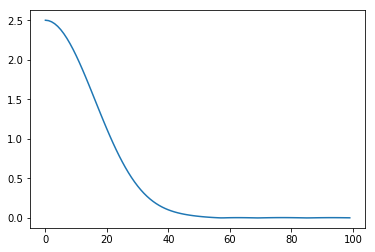

In [138]:
f_fourier_vec = np.array([ f_fourier_brute(t) for t in np.linspace(0, 1, 100) ])
plt.plot(np.abs(f_fourier_vec))